In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# create path
path = r'C:\Users\Anna\Desktop\Data Analytics\Achievment 6\Prepared data'

In [3]:
df_data = pd.read_csv(os.path.join(path,'Used Cars Cleaned.CSV'))
df_data.head()

,Unnamed: 0,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1428,1475,Maruti,1994,45000,60000,East,Massachusetts,Braintree,Petrol,Individual,Manual,First_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
1,1422,1469,Maruti,1999,52000,100000,Central,Kansas,Kansas City,Petrol,Individual,Manual,First_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
2,171,178,Maruti,1999,40000,40000,East,District of Columbia,Washington,Petrol,Individual,Manual,Second_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
3,970,1000,Maruti,1999,55000,60000,Central,Michigan,Detroit,Petrol,Individual,Manual,Second_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
4,1828,1883,Maruti,2000,110000,70000,Central,Indiana,Lawrence,Petrol,Individual,Manual,Fourth_Above_Owner,17.3,993,60.0,78Nm@ 4500rpm,5,Y


In [4]:
# checking columns content
df_data.owner.value_counts()

First_Owner           1326
Second_Owner           490
Third_Owner            135
Fourth_Above_Owner      49
Name: owner, dtype: int64

In [5]:
# checking columns content
df_data.transmission.value_counts()

Manual       1714
Automatic     286
Name: transmission, dtype: int64

In [6]:
# checking columns content
df_data.seller_type.value_counts()

Individual          1629
Dealer               291
Trustmark_Dealer      80
Name: seller_type, dtype: int64

In [7]:
# remove unwanted columns
df_data_new=df_data.drop(columns=['max_power', 'mileage', 'torque', 'Unnamed: 0'])

In [8]:
# changing the column State or Province to State
df=df_data_new.rename(columns = { 'State or Province' : 'State'})

In [9]:
# changing the column Name to Car Brand
df_car_sales=df.rename(columns = { 'name' : 'Car_brand'})

### 02. Correlation matrix

In [10]:
df_car_sales.columns

Index(['Sales_ID', 'Car_brand', 'year', 'selling_price', 'km_driven', 'Region',
       'State', 'City', 'fuel', 'seller_type', 'transmission', 'owner',
       'engine', 'seats', 'sold'],
      dtype='object')

In [11]:
# creating subset excluding categorical variables
subset = df_car_sales[['year','selling_price', 'km_driven', 'engine', 'seats']]

In [12]:
# creating a correlation matrix using pandas
subset.corr()

,year,selling_price,km_driven,engine,seats
year,1.000000,0.416338,-0.425820,0.023584,-0.009627
selling_price,0.416338,1.000000,-0.235364,0.456264,0.009365
km_driven,-0.425820,-0.235364,1.000000,0.221592,0.263775
engine,0.023584,0.456264,0.221592,1.000000,0.602689
seats,-0.009627,0.009365,0.263775,0.602689,1.000000


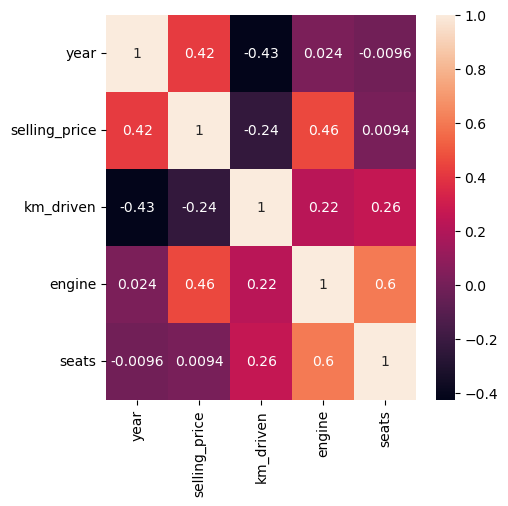

In [13]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(5,5))

# corelation heatmap in seaborn
corr = sns.heatmap(subset.corr(), annot = True, ax = ax)

The most strong relationship is observed between Engine Variable and Seats, it accounts for 0,6. There is also moderate relationship between Engine and Selling Price - 0,46 and also between Selling price and Year. There is no relationship between selling price and km_driven which is suprising.

### 03. Scatterplot 

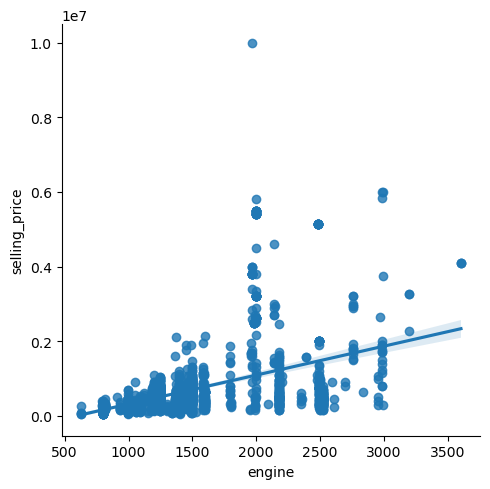

In [14]:
# Scatterplot for the "Selling Price" and the "engine"
sns.lmplot(x='engine', y ='selling_price', data = df)

Scatterplot also revealed the moderate correlation between those 2 variables, the trend line rising with the majority of dots on its beggining. There are also many outliers, especially in 2000 dimention, it means that the price for cars with such engine might significantly flactuate and maybe there is other dependent variables which have positive influence.

### 04 Pair Plots

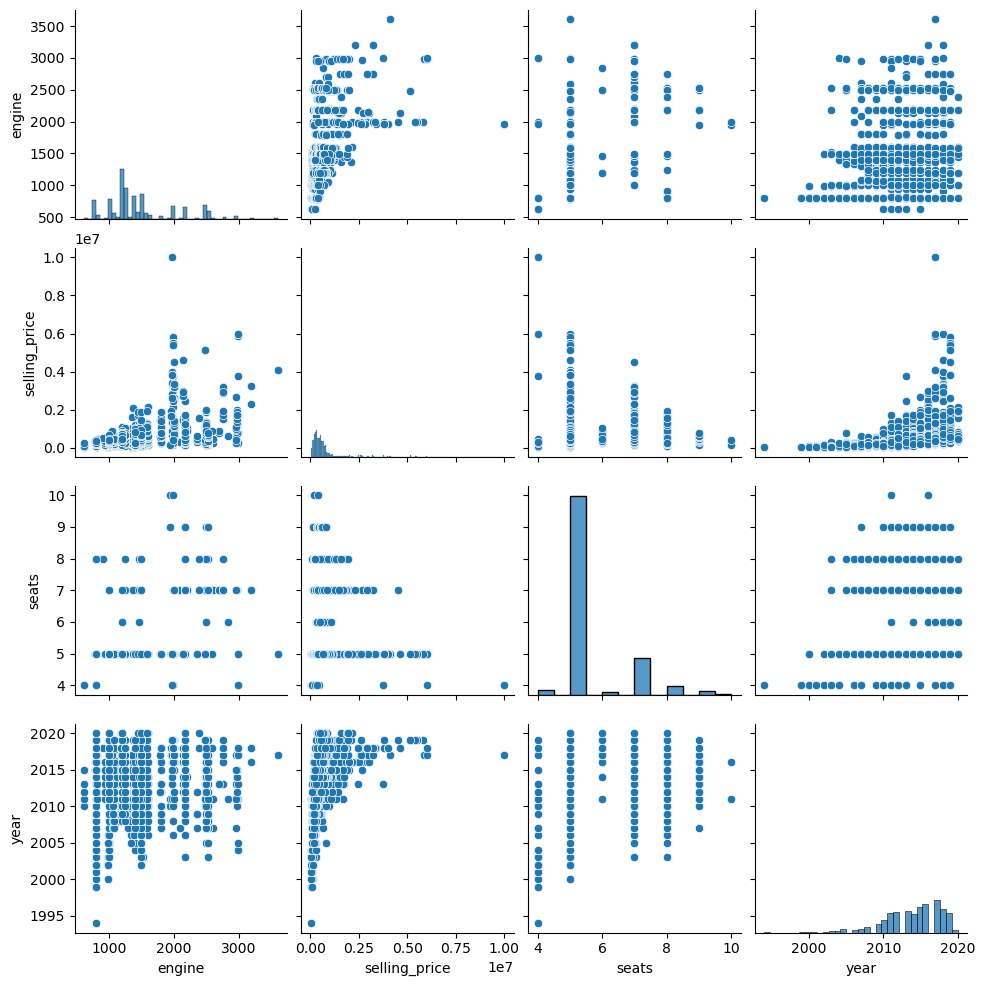

In [15]:
pp = df[['engine', 'selling_price', 'seats', 'year']]
g = sns.pairplot(pp)

This pair plot gives a broader variety of options and several variables. The selling price and engine seem like good variables to compare with others because it exhibits patterns differently from the others.

### 05 Categorical Plots

<AxesSubplot:xlabel='year', ylabel='Count'>

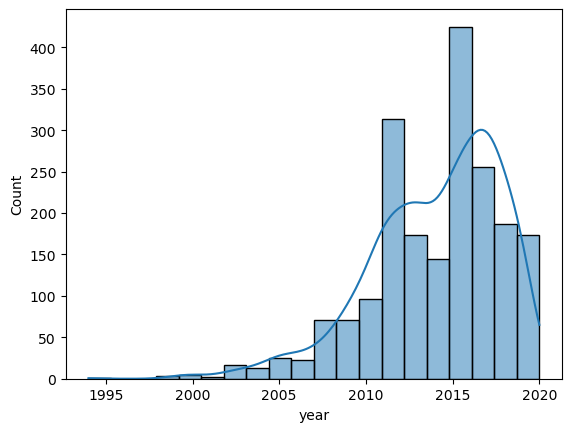

In [16]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df['year'], bins = 20, kde = True)

In [17]:
subset['year'].describe()

count    2000.000000
mean     2014.003000
std         3.793967
min      1994.000000
25%      2012.000000
50%      2015.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [18]:
df.loc[df['year'] < 2005, 'Age Category'] = 'Old Car'
df.loc[(df['year'] >= 2005) & (df['year'] < 2010), 'Age Category'] = 'Average Car'
df.loc[(df['year'] >= 2010) & (df['year'] < 2015), 'Age Category'] = 'Moderate Car'
df.loc[df['year'] >= 2015, 'Age Category'] = 'New Car'
df['Age Category'].value_counts(dropna = False)

New Car         1041
Moderate Car     728
Average Car      190
Old Car           41
Name: Age Category, dtype: int64

In [19]:
df.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State', 'City', 'fuel', 'seller_type', 'transmission', 'owner',
       'engine', 'seats', 'sold', 'Age Category'],
      dtype='object')

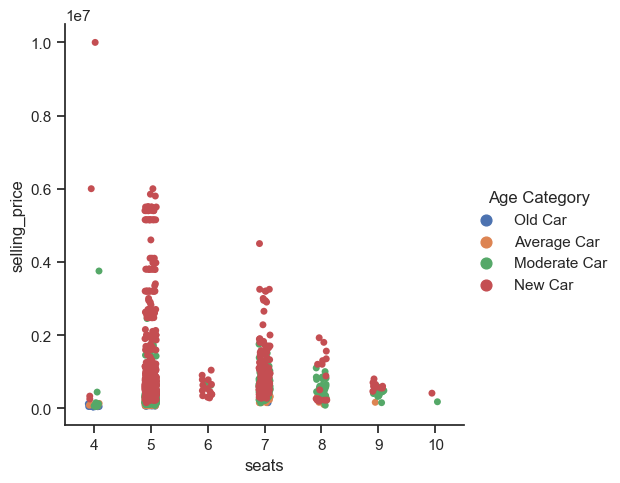

In [23]:
# creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="seats", y="selling_price", hue="Age Category", data=df)

Based on the categorical plot,it can be observed that new cars with 5 seats are the most demanding and expencive, the same as 7 seats New Cars. As the amount of New Cars is significantly prevail in data, it is difficult to identify Average and Old Cars.

### 07. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far.

As it could be seen from the research, the selling price depends on Engine, seats and Year Variable. But there os no correlation between price and km. Whereas other variables were not tested such as region or seller.

### 08. Define any hypotheses that you can at this point.

The newer car is then the selling price is higher.